<a href="https://colab.research.google.com/github/antonellafontanetto/Pre-Entrega-3/blob/main/Notebooks/Modelo_Prophet%20(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 4x4 YPF - Primer pilar Vaca Muerta**

El proyecto busca seguir la linea de pensamiento de desarrollo de la compañía YPF, en la actualidad este proyecto plantea cuadruplicar el crecimiento de la firma en los próximos 4 años. El objetivo esta centrado en 4 pilares, del cual solo vamos a focalizar en el primero, que es el crecimiento de Vaca Muerta a corto plazo.

La estrategia se basa en reducir costos operativos, optimizar los tiempos de perforación y adoptar un enfoque más eficiente en la gestión financiera. La compañía ha logrado reducir los tiempos de perforación de aproximadamente un año a 170 días, mediante mejoras técnicas y operativas.

Este plan de transformación busca posicionar a YPF como una empresa más eficiente, rentable y alineada con las tendencias internacionales del sector energético, con una visión clara en el desarrollo del shale en Argentina.

## **Modelado**

En la pre entrega 2, realizamos la transformación de todas las features utilizando One Hot Encoder, ahora vamos a limpiar y decidir en función al análisis exploratorio que features tener en consideración para el modelo.

Como observamos anteriormente tanto la producción de petróleo como la producción de gas son dos datos que queremos predecir para los próximos 4 años, sin embargo el análisis estará centrado en la Cuenca Neuquina, es decir, Vaca Muerta y las cinco principales áreas de permiso de concesión tanto para la producción de petróleo como para la producción de gas.

Así como también tenemos que mencionar que el dataset está centrado únicamente en la producción de lo no convencional, es decir, de aquella extracción que requiere tecnologías más avanzadas, costosas o intensivas en recursos debido a las características del yacimiento o del propio hidrocarburo.

Finalmente, cabe mencionar que la producción de petróleo y gas se sujeta a dos subtipos de recursos, estos son shale y tight, los mismos se diferencian según el tipo de roca y suelen requerir técnicas como la fractura hidráulica (fracking) para su extracción. Mientras que el shale se extrae de la roca sedimentaria rica en materia orgánica que actúa como fuente y reservorio del hidrocarburo, el tight se encuentra en rocas porosas pero de baja permeabilidad, como areniscas o calizas muy cementadas.


In [1]:
#descargamos todas las librerías necesarias para el desarrollo del proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Cargamos el dataset transformado en la segunda pre-entrega
Produccion_ypf = pd.read_csv('/content/prod_encoded_df (2).csv')

#Aplicamos la función head() para visualizar las primeras 5 observaciones del dataset
Produccion_ypf.head().astype(int)

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,555,18699,2021,1
1,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,472,14314,2021,2
2,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1082,19413,2021,3
3,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,678,20456,2021,4
4,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,2594,25454,2021,5


In [3]:
#Creamos una copia del dataset original
Produccion_ypf_copia2 = Produccion_ypf.copy()

columnas_a_eliminar = [
    'Tipo de pozo_Inyección de Agua',
    'Tipo de pozo_Otro tipo',
    'Tipo de pozo_Sumidero',
    'Tipo de recurso_NO CONVENCIONAL',
    'Producción de agua',
    'Area de permiso de concesion_AGUADA DEL CHAÑAR',
    'Area de permiso de concesion_AL NORTE DE LA DORSAL',
    'Area de permiso de concesion_BAJO DEL TORO',
    'Area de permiso de concesion_CERRO ARENA ',
    'Area de permiso de concesion_CERRO LAS MINAS ',
    'Area de permiso de concesion_CERRO MANRIQUE',
    'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
    'Area de permiso de concesion_CN VII A',
    'Area de permiso de concesion_DADIN',
    'Area de permiso de concesion_BAJO DEL TORO NORTE',
    'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
    'Area de permiso de concesion_FILO MORADO',
    'Area de permiso de concesion_LA ANGOSTURA SUR I',
    'Area de permiso de concesion_LA ANGOSTURA SUR II',
    'Area de permiso de concesion_LA RIBERA BLOQUE I',
    'Area de permiso de concesion_LA RIBERA BLOQUE II',
    'Area de permiso de concesion_LAS TACANAS'
]

#Con la función drop eliminamos las columnas que consideramos que no son necesarias para el análisis, en este caso solo dejamos las principales áreas de permiso de concesión por producción de petróleo y gas
Produccion_ypf = Produccion_ypf.drop(columns=columnas_a_eliminar, errors='ignore')

Produccion_ypf.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,555.0,18699.0,2021.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,472.0,14314.0,2021.0,2.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1082.0,19413.0,2021.0,3.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,678.0,20456.0,2021.0,4.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2594.0,25454.0,2021.0,5.0


**Regresión Lineal**

La regresión lineal es un modelo estadístico utilizado para predecir el valor de una variable dependiente (objetivo) a partir de una o más variables independientes (predictoras). En su forma más simple (regresión lineal simple), ajusta una línea recta a los datos con la fórmula:

𝑦
=
𝑎
+
𝑏
⋅
𝑥


donde:

1.   y es la variable dependiente,
2.   x es la variable independiente,
3.   a es la intersección con el eje Y (intercepto),
4.   b es la pendiente de la recta (coeficiente).

In [4]:
# Eliminar columnas objetivo
columnas_modelo = Produccion_ypf.drop(columns=['Produccion de Petroleo', 'Produccion de Gas']).columns.tolist()

In [5]:
# Crear X y y para entrenamiento
x = Produccion_ypf[columnas_modelo]
y = Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']]

In [6]:
x.head(10)

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA,Area de permiso de concesion_LOS CALDENES,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Año,Mes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,2.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,3.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,4.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,5.0
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,6.0
6,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,7.0
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,8.0
8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,9.0
9,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,10.0


In [7]:
lista_atributos = x.columns

In [8]:
y = Produccion_ypf[['Produccion de Petroleo','Produccion de Gas']]

In [9]:
y.head()

,Produccion de Petroleo,Produccion de Gas
0,555.0,18699.0
1,472.0,14314.0
2,1082.0,19413.0
3,678.0,20456.0
4,2594.0,25454.0


In [10]:
x, y =np.array(x), np.array(y)

In [11]:
x

array([[1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        1.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        2.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        3.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        2.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        3.000e+00]])

In [12]:
y[:15]

array([[  555., 18699.],
       [  472., 14314.],
       [ 1082., 19413.],
       [  678., 20456.],
       [ 2594., 25454.],
       [ 3382., 34763.],
       [ 2267., 66193.],
       [ 2824., 72976.],
       [ 2671., 73914.],
       [ 1513., 73796.],
       [ 2069., 71993.],
       [ 2463., 76144.],
       [ 2461., 77355.],
       [ 2677., 72220.],
       [ 3435., 76838.]])

### **Separando Train-Test**

Antes de entrenar el modelo, dividimos el dataset en dos partes:

1. Conjunto de entrenamiento (train): se utiliza para entrenar el modelo, es decir, para que el algoritmo aprenda la relación entre las variables.

2. Conjunto de prueba (test): se utiliza para evaluar el desempeño del modelo con datos que no ha visto antes, simulando cómo funcionará con datos nuevos.

Esto es importante para evitar el sobreajuste (overfitting), que ocurre cuando el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien.

In [13]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)  #un numero aleatorio para fijar cuantas veces testeamos

In [15]:
x.shape

(3246, 26)

In [16]:

X_train.shape

(2596, 26)

In [17]:

X_test.shape

(650, 26)

In [18]:

from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

### **XGBoost**

XGBoost (Extreme Gradient Boosting) es un modelo de aprendizaje supervisado basado en árboles de decisión, diseñado para lograr alta precisión y eficiencia. Utiliza la técnica de boosting, que construye múltiples árboles de manera secuencial, donde cada árbol nuevo corrige los errores del anterior.

En este proyecto, XGBoost se aplica para predecir la producción de petróleo y la producción de gas, utilizando como variables explicativas datos históricos como las áreas de permiso de concesión, el subtipo de recurso, el tipo de pozo, etc.

Gracias a su capacidad para manejar relaciones no lineales y su mecanismo de regularización, XGBoost resulta especialmente útil para modelar fenómenos complejos del sector energético con gran precisión.


In [19]:
from xgboost import XGBRegressor

In [20]:
modelo_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.3,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='reg:squarederror',  # Para regresión
    random_state=42
)

In [21]:
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [22]:
y_pred_xgb = modelo_xgb.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Esto equivale a squared=False
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


MAE: 3541.71227182425
RMSE: 7579.920128684703
R²: 0.9567754942439126


`MultiOutputRegressor` permite adaptar modelos de regresión que solo predicen una variable para que puedan predecir múltiples variables objetivo. Lo hace entrenando un estimador independiente por cada salida. Es útil en problemas de regresión multivariada donde se quieren predecir varias variables numéricas a la vez.

In [24]:
# Asegurarte que X tenga las columnas nuevas
X = Produccion_ypf_copia2[columnas_modelo]
y = Produccion_ypf_copia2[['Produccion de Petroleo', 'Produccion de Gas']]

# Ejemplo con XGBoost Regressor multisalida
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
best_model = MultiOutputRegressor(xgb_model)
best_model.fit(X, y)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

El siguiente código realiza una predicción mensual y anual futura de la producción de petróleo y gas de YPF hasta diciembre de 2027, utilizando un modelo de regresión entrenado con XGBRegressor.

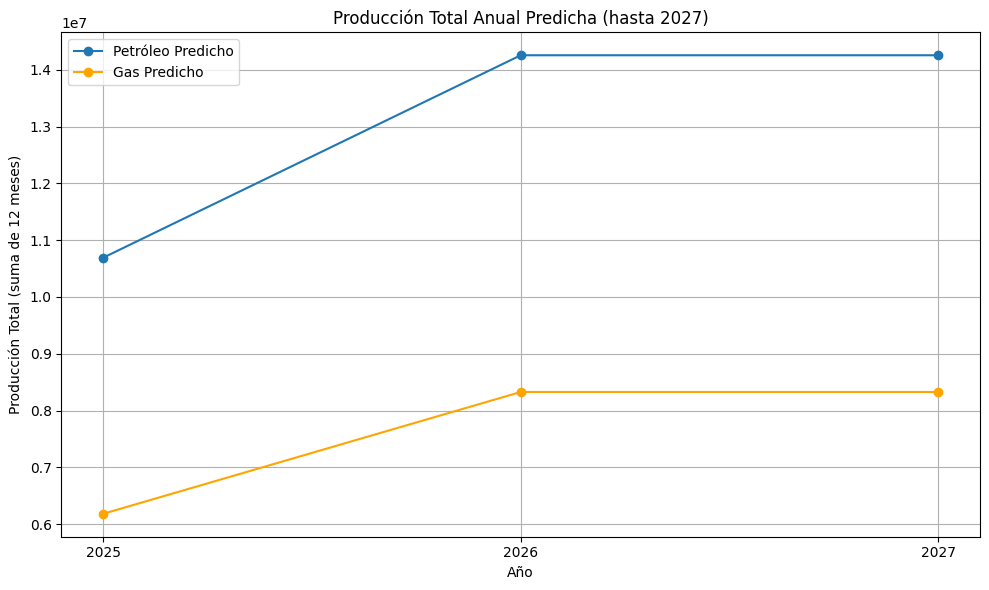

Predicción Anual Total de Producción:
    Año  Produccion de Petroleo Predicha  Produccion de Gas Predicha
0  2025                       10691245.0                   6184492.0
1  2026                       14253946.0                   8327990.0
2  2027                       14253946.0                   8327990.0


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Enriquecer el dataset original
# Se agregan tres columnas nuevas para ayudar al modelo:
# Meses_desde_inicio: convierte año y mes en una única secuencia de meses.
# Mes_sin y Mes_cos: codifican el mes del año de forma cíclica (útil para modelos que no entienden estacionalidad).

Produccion_ypf['Meses_desde_inicio'] = (Produccion_ypf['Año'] - Produccion_ypf['Año'].min()) * 12 + (Produccion_ypf['Mes'] - 1)
Produccion_ypf['Mes_sin'] = np.sin(2 * np.pi * Produccion_ypf['Mes'] / 12)
Produccion_ypf['Mes_cos'] = np.cos(2 * np.pi * Produccion_ypf['Mes'] / 12)

# 2. Definir X e y
# X: contiene las columnas con las que el modelo va a aprender a predecir.
# y: contiene las variables objetivo (lo que se quiere predecir).

columnas_modelo = Produccion_ypf.drop(columns=['Produccion de Petroleo', 'Produccion de Gas'], errors='ignore').columns.tolist()
X = Produccion_ypf[columnas_modelo]
y = Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']]

# 3. Guardar columnas exactas usadas en el entrenamiento
columnas_entrenamiento = columnas_modelo.copy()

# 4. Entrenar modelo (ejemplo: reemplazá con el tuyo si ya tenés uno entrenado)
from xgboost import XGBRegressor
best_model = XGBRegressor()
best_model.fit(X, y)

# 5. Último año y mes del dataset
ultimo_año = int(Produccion_ypf['Año'].max())
ultimo_mes = int(Produccion_ypf[Produccion_ypf['Año'] == ultimo_año]['Mes'].max())

# 6. Crear fechas desde el mes siguiente hasta diciembre 2027
# Se genera una lista de meses futuros para hacer predicciones, desde el mes siguiente al último disponible hasta diciembre de 2027.

fecha_inicio = pd.to_datetime(f'{ultimo_año}-{ultimo_mes:02d}-01') + pd.DateOffset(months=1)
fecha_fin = pd.to_datetime('2027-12-01')
fechas_futuras = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='MS')

# 7. Tomar todas las filas del último mes como base
# Se toma como base las filas del último mes del dataset (sin las columnas objetivo), para copiar su estructura.

base_mes = Produccion_ypf[
    (Produccion_ypf['Año'] == ultimo_año) & (Produccion_ypf['Mes'] == ultimo_mes)
].drop(columns=['Produccion de Petroleo', 'Produccion de Gas'], errors='ignore')

# 8. Crear DataFrame con fechas futuras replicando todas las filas
filas_futuras = []
for fecha in fechas_futuras:
    copia_mes = base_mes.copy()
    copia_mes['Año'] = fecha.year
    copia_mes['Mes'] = fecha.month
    copia_mes['Meses_desde_inicio'] = (fecha.year - Produccion_ypf['Año'].min()) * 12 + (fecha.month - 1)
    copia_mes['Mes_sin'] = np.sin(2 * np.pi * fecha.month / 12)
    copia_mes['Mes_cos'] = np.cos(2 * np.pi * fecha.month / 12)
    filas_futuras.append(copia_mes)

future_df = pd.concat(filas_futuras, ignore_index=True)

# 9. Asegurar columnas correctas y orden
future_df = future_df[columnas_entrenamiento]

# 10. Predecir producción mes a mes
# Se predicen los valores de petróleo y gas para cada mes futuro. Se agregan dos nuevas columnas con esos resultados.

future_predictions = best_model.predict(future_df.values)
future_df['Produccion de Petroleo Predicha'] = future_predictions[:, 0]
future_df['Produccion de Gas Predicha'] = future_predictions[:, 1]

# 11. Agrupar por año (suma total de cada año)
# Se suman las predicciones mensuales para obtener la producción total anual estimada por variable.

prediccion_anual_futura = future_df.groupby('Año')[['Produccion de Petroleo Predicha', 'Produccion de Gas Predicha']].sum().reset_index()

# 12. Graficar
plt.figure(figsize=(10, 6))
plt.plot(prediccion_anual_futura['Año'], prediccion_anual_futura['Produccion de Petroleo Predicha'], marker='o', label='Petróleo Predicho')
plt.plot(prediccion_anual_futura['Año'], prediccion_anual_futura['Produccion de Gas Predicha'], marker='o', label='Gas Predicho', color='orange')
plt.title('Producción Total Anual Predicha (hasta 2027)')
plt.xlabel('Año')
plt.ylabel('Producción Total (suma de 12 meses)')
plt.xticks(prediccion_anual_futura['Año'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 13. Mostrar tabla
# Se imprime por pantalla la tabla con la producción total estimada por año.

print("Predicción Anual Total de Producción:")
print(prediccion_anual_futura)

### **Prophet**

Prophet es un modelo de series temporales desarrollado por Facebook, diseñado para manejar datos con patrones estacionales diarios, semanales y anuales, así como efectos de feriados. Es robusto ante datos faltantes y cambios en las tendencias, y permite hacer predicciones futuras de manera automática. Prophet es especialmente útil en contextos donde se desea pronosticar a partir de datos históricos con estructura temporal.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8go2b4x1/tdx9xqkg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8go2b4x1/gskd1bay.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30233', 'data', 'file=/tmp/tmp8go2b4x1/tdx9xqkg.json', 'init=/tmp/tmp8go2b4x1/gskd1bay.json', 'output', 'file=/tmp/tmp8go2b4x1/prophet_modelxlw4eb30/prophet_model-20250616162742.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:27:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


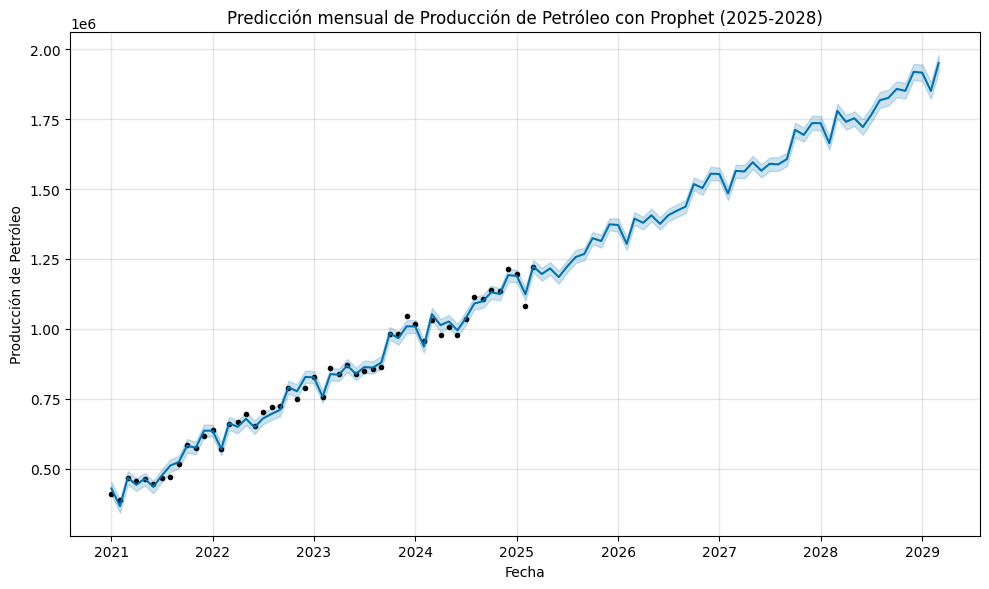

                    yhat
ds                      
2025-01-01  1.189236e+06
2025-02-01  1.123948e+06
2025-03-01  1.223452e+06
2025-04-01  1.196255e+06
2025-05-01  1.216120e+06
2025-06-01  1.185230e+06
2025-07-01  1.222537e+06
2025-08-01  1.256760e+06
2025-09-01  1.267907e+06
2025-10-01  1.324291e+06
2025-11-01  1.314070e+06
2025-12-01  1.373627e+06
2026-01-01  1.371446e+06
2026-02-01  1.304014e+06
2026-03-01  1.394110e+06
2026-04-01  1.379323e+06
2026-05-01  1.405928e+06
2026-06-01  1.375407e+06
2026-07-01  1.406502e+06
2026-08-01  1.422534e+06
2026-09-01  1.437054e+06
2026-10-01  1.517605e+06
2026-11-01  1.503722e+06
2026-12-01  1.554799e+06
2027-01-01  1.553497e+06
2027-02-01  1.483931e+06
2027-03-01  1.564892e+06
2027-04-01  1.562739e+06
2027-05-01  1.595854e+06
2027-06-01  1.565430e+06
2027-07-01  1.590027e+06
2027-08-01  1.588110e+06
2027-09-01  1.606612e+06
2027-10-01  1.711258e+06
2027-11-01  1.693299e+06
2027-12-01  1.735774e+06
2028-01-01  1.735390e+06
2028-02-01  1.663703e+06


In [26]:
# Prophet, el modelo de series temporales desarrollado por Facebook/Meta.
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Crear columna de fecha
# Se construye una nueva columna fecha combinando las columnas Año y Mes, con el día fijado en 1. Esta columna será usada como eje temporal para el modelo Prophet.
Produccion_ypf['fecha'] = pd.to_datetime({
    'year': Produccion_ypf['Año'].astype(int),
    'month': Produccion_ypf['Mes'].astype(int),
    'day': 1
})

# Agrupar y preparar datos para Prophet
# Se establece fecha como índice del DataFrame.
# Se usa .resample('MS') para asegurar que los datos estén agregados por mes (MS = Month Start).
# Se crea un nuevo DataFrame df_prophet con dos columnas renombradas:
# ds: la fecha
# y: el valor a predecir (producción de petróleo)
# Prophet requiere obligatoriamente estas dos columnas con esos nombres.

serie = Produccion_ypf.set_index('fecha')['Produccion de Petroleo'].resample('MS').sum()
df_prophet = serie.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet necesita estas columnas

# Crear y entrenar el modelo
# Se instancia el modelo Prophet y se entrena con los datos históricos. El modelo aprende las tendencias, estacionalidad y patrones de la serie temporal.
modelo = Prophet()
modelo.fit(df_prophet)

# Crear fechas futuras hasta diciembre de 2028
# Se generan 48 fechas mensuales futuras a partir de la última fecha en el dataset (hasta diciembre 2028).
# Se hace la predicción con .predict(), que devuelve un DataFrame con múltiples columnas, incluyendo:
# yhat: la predicción central
# yhat_lower y yhat_upper: intervalo de confianza
# trend, seasonal, etc.

futuro = modelo.make_future_dataframe(periods=48, freq='MS')  # 4 años más
forecast = modelo.predict(futuro)

# Graficar resultados
# Se crea el gráfico con:
# La línea azul (yhat): predicción mensual.
# Intervalo sombreado: margen de incertidumbre.
# Líneas negras: datos históricos reales.
# Se personaliza el gráfico con título, etiquetas y una grilla para mejor visualización.

fig = modelo.plot(forecast)
plt.title('Predicción mensual de Producción de Petróleo con Prophet (2025-2028)')
plt.xlabel('Fecha')
plt.ylabel('Producción de Petróleo')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar tabla de predicción de 2025 en adelante
print(forecast[['ds', 'yhat']].set_index('ds').loc['2025-01-01':'2028-12-01'])

Mismo gráfico pero con leyenda incorporada

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8go2b4x1/ikoe7ec1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8go2b4x1/4wi0hefj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90794', 'data', 'file=/tmp/tmp8go2b4x1/ikoe7ec1.json', 'init=/tmp/tmp8go2b4x1/4wi0hefj.json', 'output', 'file=/tmp/tmp8go2b4x1/prophet_model_q80o7ao/prophet_model-20250616162742.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:27:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


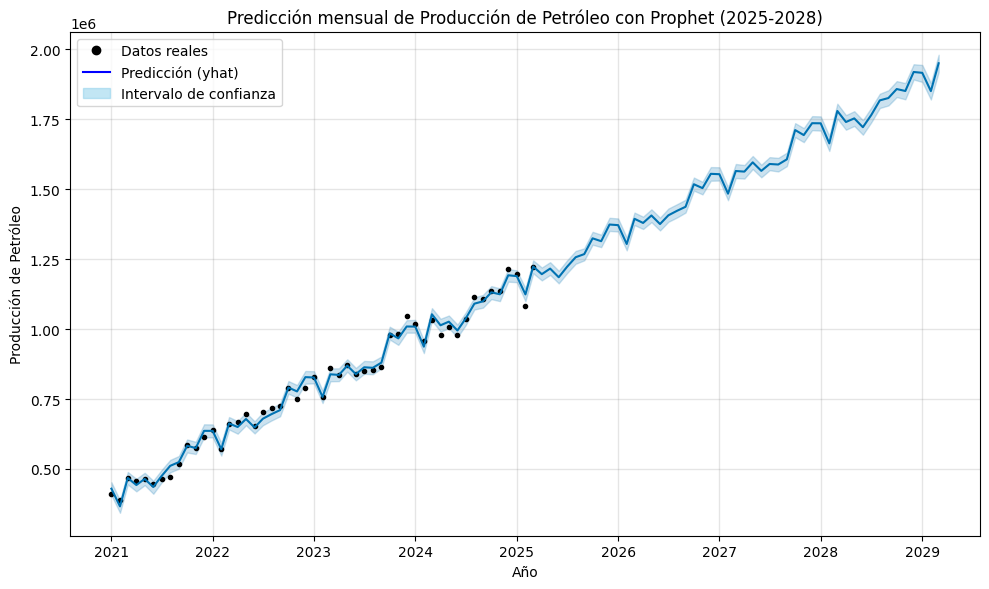

                    yhat
ds                      
2025-01-01  1.189236e+06
2025-02-01  1.123948e+06
2025-03-01  1.223452e+06
2025-04-01  1.196255e+06
2025-05-01  1.216120e+06
2025-06-01  1.185230e+06
2025-07-01  1.222537e+06
2025-08-01  1.256760e+06
2025-09-01  1.267907e+06
2025-10-01  1.324291e+06
2025-11-01  1.314070e+06
2025-12-01  1.373627e+06
2026-01-01  1.371446e+06
2026-02-01  1.304014e+06
2026-03-01  1.394110e+06
2026-04-01  1.379323e+06
2026-05-01  1.405928e+06
2026-06-01  1.375407e+06
2026-07-01  1.406502e+06
2026-08-01  1.422534e+06
2026-09-01  1.437054e+06
2026-10-01  1.517605e+06
2026-11-01  1.503722e+06
2026-12-01  1.554799e+06
2027-01-01  1.553497e+06
2027-02-01  1.483931e+06
2027-03-01  1.564892e+06
2027-04-01  1.562739e+06
2027-05-01  1.595854e+06
2027-06-01  1.565430e+06
2027-07-01  1.590027e+06
2027-08-01  1.588110e+06
2027-09-01  1.606612e+06
2027-10-01  1.711258e+06
2027-11-01  1.693299e+06
2027-12-01  1.735774e+06
2028-01-01  1.735390e+06
2028-02-01  1.663703e+06


In [27]:
# Prophet, el modelo de series temporales desarrollado por Facebook/Meta.
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Crear columna de fecha
# Se construye una nueva columna fecha combinando las columnas Año y Mes, con el día fijado en 1. Esta columna será usada como eje temporal para el modelo Prophet.
Produccion_ypf['fecha'] = pd.to_datetime({
    'year': Produccion_ypf['Año'].astype(int),
    'month': Produccion_ypf['Mes'].astype(int),
    'day': 1
})

# Agrupar y preparar datos para Prophet
# Se establece fecha como índice del DataFrame.
# Se usa .resample('MS') para asegurar que los datos estén agregados por mes (MS = Month Start).
# Se crea un nuevo DataFrame df_prophet con dos columnas renombradas:
# ds: la fecha
# y: el valor a predecir (producción de petróleo)
# Prophet requiere obligatoriamente estas dos columnas con esos nombres.
serie = Produccion_ypf.set_index('fecha')['Produccion de Petroleo'].resample('MS').sum()
df_prophet = serie.reset_index()
df_prophet.columns = ['ds', 'y']

# Crear y entrenar el modelo
# Se instancia el modelo Prophet y se entrena con los datos históricos. El modelo aprende las tendencias, estacionalidad y patrones de la serie temporal.
modelo = Prophet()
modelo.fit(df_prophet)

# Crear fechas futuras hasta diciembre de 2028
# Se generan 48 fechas mensuales futuras a partir de la última fecha en el dataset (hasta diciembre 2028).
# Se hace la predicción con .predict(), que devuelve un DataFrame con múltiples columnas, incluyendo:
# yhat: la predicción central
# yhat_lower y yhat_upper: intervalo de confianza
# trend, seasonal, etc.
futuro = modelo.make_future_dataframe(periods=48, freq='MS')
forecast = modelo.predict(futuro)

# Graficar resultados
# Se crea el gráfico con:
# La línea azul (yhat): predicción mensual.
# Intervalo sombreado: margen de incertidumbre.
# Líneas negras: datos históricos reales.
# Se personaliza el gráfico con título, etiquetas, grilla y leyenda explicativa.
fig = modelo.plot(forecast)
plt.title('Predicción mensual de Producción de Petróleo con Prophet (2025-2028)')
plt.xlabel('Año')
plt.ylabel('Producción de Petróleo')
plt.grid(True)

# Agregar leyenda explicativa
# 🔵 Línea azul: predicción central
# 🔷 Franja celeste: intervalo de confianza (yhat_lower - yhat_upper)
# ⚫ Puntos negros: datos reales

linea_azul = Line2D([0], [0], color='blue', label='Predicción (yhat)')
franja_celeste = mpatches.Patch(color='skyblue', alpha=0.5, label='Intervalo de confianza')
puntos_negros = Line2D([0], [0], marker='o', color='black', linestyle='None', label='Datos reales')

plt.legend(handles=[puntos_negros, linea_azul, franja_celeste], loc='upper left')

plt.tight_layout()
plt.show()

# Mostrar tabla de predicción de 2025 en adelante
print(forecast[['ds', 'yhat']].set_index('ds').loc['2025-01-01':'2028-12-01'])


El gráfico anterior muestra la predicción mensual de la producción de petróleo realizada con el modelo Prophet, utilizando datos históricos desde 2021 hasta 2024 y proyectando el comportamiento de la producción hasta diciembre de 2028.

* Los puntos negros representan los valores reales observados de producción mensual.

* La línea azul corresponde a la predicción (yhat) estimada por el modelo para cada mes.

* Las bandas celestes alrededor de la línea azul indican el intervalo de confianza del modelo, es decir, el rango en el que se espera que se encuentre el valor real con alta probabilidad.

Se observa una tendencia creciente sostenida en la producción de petróleo, lo que sugiere un escenario optimista para los próximos años si se mantienen las condiciones actuales.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8go2b4x1/824koafl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8go2b4x1/ldi24h3b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74778', 'data', 'file=/tmp/tmp8go2b4x1/824koafl.json', 'init=/tmp/tmp8go2b4x1/ldi24h3b.json', 'output', 'file=/tmp/tmp8go2b4x1/prophet_modelksgej9t0/prophet_model-20250616162743.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:27:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


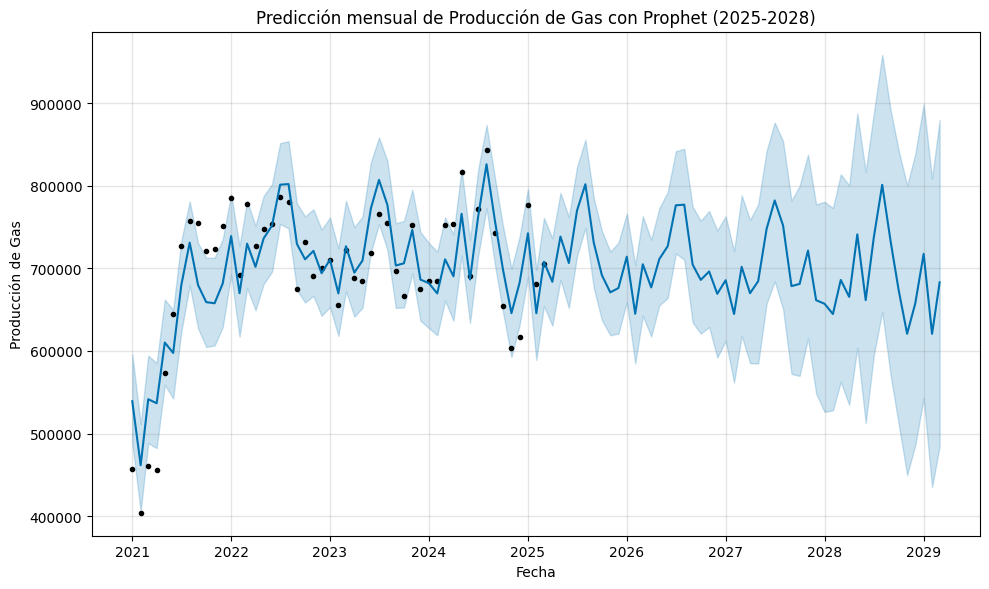

                     yhat
ds                       
2025-01-01  742565.158902
2025-02-01  645669.682135
2025-03-01  708038.116867
2025-04-01  683797.909989
2025-05-01  738528.032814
2025-06-01  706509.039951
2025-07-01  769844.002754
2025-08-01  801951.667169
2025-09-01  731045.050362
2025-10-01  691725.778460
2025-11-01  670988.475212
2025-12-01  676205.276220
2026-01-01  714186.924288
2026-02-01  645063.025569
2026-03-01  705027.628274
2026-04-01  676967.390924
2026-05-01  711327.479451
2026-06-01  726893.130282
2026-07-01  776407.668370
2026-08-01  777179.830790
2026-09-01  704638.298214
2026-10-01  686081.530750
2026-11-01  696283.884905
2026-12-01  669206.661784
2027-01-01  685722.536518
2027-02-01  644760.463026
2027-03-01  701928.472775
2027-04-01  669950.949065
2027-05-01  684552.884375
2027-06-01  747660.229563
2027-07-01  782281.477125
2027-08-01  751851.400578
2027-09-01  678536.651501
2027-10-01  681220.792792
2027-11-01  721619.409868
2027-12-01  661506.908819
2028-01-01  

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Crear columna de fecha
Produccion_ypf['fecha'] = pd.to_datetime({
    'year': Produccion_ypf['Año'].astype(int),
    'month': Produccion_ypf['Mes'].astype(int),
    'day': 1
})

# Agrupar y preparar datos para Prophet
serie = Produccion_ypf.set_index('fecha')['Produccion de Gas'].resample('MS').sum()
df_prophet = serie.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet necesita estas columnas

# Crear y entrenar el modelo
modelo = Prophet()
modelo.fit(df_prophet)

# Crear fechas futuras hasta diciembre de 2028
futuro = modelo.make_future_dataframe(periods=48, freq='MS')  # 4 años más
forecast = modelo.predict(futuro)

# Graficar resultados
fig = modelo.plot(forecast)
plt.title('Predicción mensual de Producción de Gas con Prophet (2025-2028)')
plt.xlabel('Fecha')
plt.ylabel('Producción de Gas')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar tabla de predicción de 2025 en adelante
print(forecast[['ds', 'yhat']].set_index('ds').loc['2025-01-01':'2028-12-01'])

Mismo gráfico que el anterior pero con leyenda incorporada

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8go2b4x1/jtwfqglj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8go2b4x1/9122tb0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8496', 'data', 'file=/tmp/tmp8go2b4x1/jtwfqglj.json', 'init=/tmp/tmp8go2b4x1/9122tb0h.json', 'output', 'file=/tmp/tmp8go2b4x1/prophet_modelvbfcrwko/prophet_model-20250616162744.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:27:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


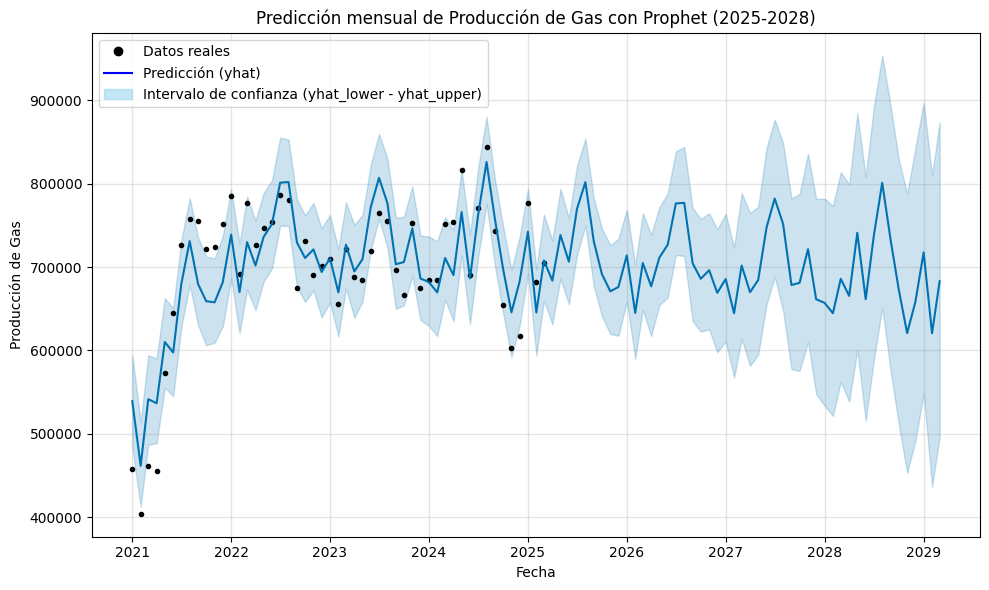

                     yhat
ds                       
2025-01-01  742565.158902
2025-02-01  645669.682135
2025-03-01  708038.116867
2025-04-01  683797.909989
2025-05-01  738528.032814
2025-06-01  706509.039951
2025-07-01  769844.002754
2025-08-01  801951.667169
2025-09-01  731045.050362
2025-10-01  691725.778460
2025-11-01  670988.475212
2025-12-01  676205.276220
2026-01-01  714186.924288
2026-02-01  645063.025569
2026-03-01  705027.628274
2026-04-01  676967.390924
2026-05-01  711327.479451
2026-06-01  726893.130282
2026-07-01  776407.668370
2026-08-01  777179.830790
2026-09-01  704638.298214
2026-10-01  686081.530750
2026-11-01  696283.884905
2026-12-01  669206.661784
2027-01-01  685722.536518
2027-02-01  644760.463026
2027-03-01  701928.472775
2027-04-01  669950.949065
2027-05-01  684552.884375
2027-06-01  747660.229563
2027-07-01  782281.477125
2027-08-01  751851.400578
2027-09-01  678536.651501
2027-10-01  681220.792792
2027-11-01  721619.409868
2027-12-01  661506.908819
2028-01-01  

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Crear columna de fecha
Produccion_ypf['fecha'] = pd.to_datetime({
    'year': Produccion_ypf['Año'].astype(int),
    'month': Produccion_ypf['Mes'].astype(int),
    'day': 1
})

# Agrupar y preparar datos para Prophet
serie = Produccion_ypf.set_index('fecha')['Produccion de Gas'].resample('MS').sum()
df_prophet = serie.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet necesita estas columnas

# Crear y entrenar el modelo
modelo = Prophet()
modelo.fit(df_prophet)

# Crear fechas futuras hasta diciembre de 2028
futuro = modelo.make_future_dataframe(periods=48, freq='MS')  # 4 años más
forecast = modelo.predict(futuro)

# Graficar resultados
fig = modelo.plot(forecast)
plt.title('Predicción mensual de Producción de Gas con Prophet (2025-2028)')
plt.xlabel('Fecha')
plt.ylabel('Producción de Gas')
plt.grid(True)

# Agregar leyenda personalizada
linea_azul = Line2D([0], [0], color='blue', label='Predicción (yhat)')
franja_celeste = mpatches.Patch(color='skyblue', alpha=0.5, label='Intervalo de confianza (yhat_lower - yhat_upper)')
puntos = Line2D([0], [0], marker='o', color='black', linestyle='None', label='Datos reales')

plt.legend(handles=[puntos, linea_azul, franja_celeste], loc='upper left')

plt.tight_layout()
plt.show()

# Mostrar tabla de predicción de 2025 en adelante
print(forecast[['ds', 'yhat']].set_index('ds').loc['2025-01-01':'2028-12-01'])


El gráfico anterior muestra la predicción mensual de la producción de gas realizada con el modelo Prophet, a partir de datos históricos desde 2021 hasta 2024, proyectando valores hasta diciembre de 2028.

* Los puntos negros indican los valores reales observados de producción mensual.

* La línea azul representa la predicción central (yhat) realizada por Prophet.

* Las bandas celestes muestran el intervalo de confianza, es decir, el rango dentro del cual se espera que se encuentre la producción real con alta probabilidad.

A diferencia del comportamiento observado en la producción de petróleo, este gráfico muestra una tendencia más estable y con mayor variabilidad en las predicciones futuras. El modelo estima que la producción de gas se mantendría relativamente constante, aunque con un aumento de la incertidumbre a medida que se proyecta hacia años posteriores.

In [30]:
# Separar últimos 12 meses como conjunto de prueba
horizon = 12
train = df_prophet.iloc[:-horizon]
test = df_prophet.iloc[-horizon:]

In [31]:
modelo = Prophet()
modelo.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8go2b4x1/5hx8db_5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8go2b4x1/h4jy4sy4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13578', 'data', 'file=/tmp/tmp8go2b4x1/5hx8db_5.json', 'init=/tmp/tmp8go2b4x1/h4jy4sy4.json', 'output', 'file=/tmp/tmp8go2b4x1/prophet_modelf1w3pvx5/prophet_model-20250616162744.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:27:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
future_test = modelo.make_future_dataframe(periods=horizon, freq='MS')
forecast_test = modelo.predict(future_test)

# Extraer solo las predicciones para el horizonte de prueba
pred_test = forecast_test[['ds', 'yhat']].set_index('ds').loc[test['ds'].values]

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = test['y'].values
y_pred = pred_test['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = (abs((y_true - y_pred) / y_true).mean()) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 51743.27
RMSE: 64859.03
MAPE: 7.22%


**Evaluación del modelo Prophet:**

Se calcularon las métricas de error para evaluar el desempeño del modelo Prophet utilizando los datos históricos:

* **MAE (Mean Absolute Error) = 51.743:**
En promedio, el modelo comete un error absoluto de aproximadamente 51.743 unidades en sus predicciones. Es una medida directa de la magnitud del error, sin importar su dirección (positivo o negativo).

* **RMSE (Root Mean Squared Error) = 64.859:**
El error cuadrático medio penaliza más fuertemente los errores grandes. En este caso, el valor indica que los errores típicos del modelo tienen una magnitud cercana a 64.859 unidades, lo cual confirma que el modelo tiene una buena precisión general y que no hay errores extremos significativos.

* **MAPE (Mean Absolute Percentage Error) = 7.22%:**
Esta métrica expresa el error promedio en porcentaje con respecto a los valores reales. Un MAPE menor al 10% generalmente se considera una muy buena precisión para modelos de series temporales, lo cual indica que Prophet está capturando adecuadamente la tendencia de la producción.

**Conclusión:**
El modelo Prophet logra un buen desempeño general para la predicción de la producción mensual, manteniendo errores relativamente bajos tanto en términos absolutos como relativos. Esto sugiere que el modelo puede ser utilizado con confianza para generar escenarios de producción futuros.

In [34]:
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
print(f"R²: {r2:.4f}")

R²: 0.2023


**Sobre el uso del Coeficiente de Determinación (R²) en modelos Prophet**

El coeficiente de determinación, o R², es una métrica ampliamente usada en problemas de regresión para medir qué tan bien un modelo explica la variabilidad de los datos. Sin embargo, en el contexto de modelos de series temporales como Prophet, el uso del R² tiene ciertas limitaciones:

* Las series temporales presentan dependencias temporales y autocorrelación, lo que puede hacer que el R² sobreestime o subestime la capacidad predictiva real del modelo.

* Prophet modela componentes específicos como tendencias, estacionalidades y efectos de vacaciones, por lo que la varianza explicada puede no reflejar completamente la calidad de las predicciones en el horizonte temporal deseado.

* Otras métricas como MAE, RMSE y MAPE son más intuitivas y útiles para evaluar el error de predicción en términos absolutos y relativos, proporcionando una mejor interpretación práctica.

Por estas razones, aunque calcular R² no está prohibido, no se recomienda tomarlo como métrica principal para evaluar modelos Prophet. En cambio, se sugiere utilizar métricas de error absolutas y porcentuales que reflejan directamente el desempeño predictivo en los datos reales.